## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import math

In [2]:

#  Import and read the charity_data.csv.
#application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df = pd.read_csv("Data/charity_data.csv")[["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "IS_SUCCESSFUL"]]
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,0,1
1,T3,Independent,C2000,Co-operative,1-9999,1
2,T5,CompanySponsored,C3000,Association,0,0
3,T3,CompanySponsored,C2000,Trust,10000-24999,1
4,T3,Independent,C1000,Trust,100000-499999,1


In [3]:
# Choose a cutoff value and create a list of application types to be replaced
for app in application_df['APPLICATION_TYPE'].value_counts().index[8:]:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Choose a cutoff value and create a list of affiliations to be replaced
for app in application_df['AFFILIATION'].value_counts().index[2:]:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(app,"Other")

# Choose a cutoff value and create a list of classifications to be replaced
for cls in application_df['CLASSIFICATION'].value_counts().index[5:]:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Choose a cutoff value and create a list of organizations to be replaced
for app in application_df['ORGANIZATION'].value_counts().index[2:]:
    application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace(app,"Other")

# Choose a cutoff value and create a list of income amounts to be replaced
for inc in application_df['INCOME_AMT'].value_counts().index[3:]:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(inc,"Other")

# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
# Split our preprocessed data into our features and target arrays
features = application_df.drop("IS_SUCCESSFUL", axis=1)
target = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)

In [5]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [6]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(features.columns)

model = tf.keras.models.Sequential()

# Hidden layers
model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=num_features))
model.add(tf.keras.layers.Dense(units=30, activation="tanh"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2080      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4541 (17.74 KB)
Trainable params: 4541 (17.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [8]:
checkpoint_path = "checkpoints/optimized/cp-{epoch:02d}.ckpt"

batch_size = 128
batches_per_step = math.ceil(len(X_train_scaled) / batch_size)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq=5*batches_per_step)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[cp_callback],
    batch_size=batch_size,
    validation_data=(X_test_scaled, y_test)
    )

Epoch 1/100
201/201 [==============================] - 1s 4ms/step - loss: 0.5791 - accuracy: 0.7115 - val_loss: 0.5663 - val_accuracy: 0.7256
Epoch 2/100
201/201 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7252 - val_loss: 0.5626 - val_accuracy: 0.7263
Epoch 3/100
201/201 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7246 - val_loss: 0.5608 - val_accuracy: 0.7272
Epoch 4/100
201/201 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7271 - val_loss: 0.5591 - val_accuracy: 0.7283
Epoch 5/100
184/201 [==========================>...] - ETA: 0s - loss: 0.5561 - accuracy: 0.7275
Epoch 5: saving model to checkpoints/optimized\cp-05.ckpt
201/201 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7272 - val_loss: 0.5608 - val_accuracy: 0.7275
Epoch 6/100
201/201 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7274 - val_loss: 0.5592 - val_accuracy: 0.7280

<Axes: >

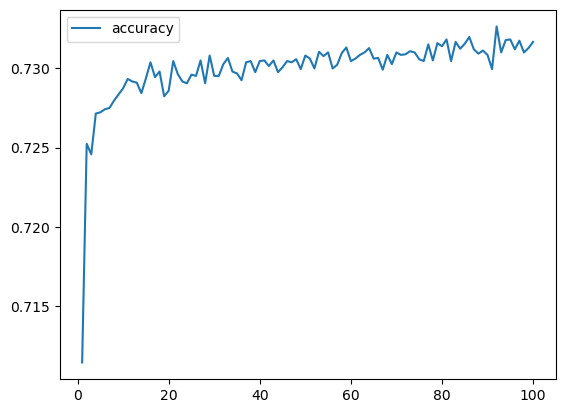

In [9]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.plot(y="accuracy")

In [10]:
# Export our model to HDF5 file
model.save("Data/AlphabetSoupCharity_Optimization.h5")

c:\Users\chodn\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
